In [28]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import string
# Download the stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# from gensim.models import LdaMallet
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fpatr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fpatr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df_concatenate_csv = pd.read_csv("Library\combined_output.csv")
df_concatenate_csv

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,68798737,1,68804208.0,NaN,2021-08-16 07:13:10,NaN,0,396.0,<p>How do I get args like epochs to show up in...,15418028.0,...,NaN,2021-08-16 14:06:01,ClearML How to get configurable hyperparameters?,<devops><mlops><clearml><trains>,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0
1,69127220,1,NaN,NaN,2021-09-10 04:19:25,NaN,0,534.0,<p>I am using clearml for testing algorithms a...,16875317.0,...,NaN,2022-04-17 13:11:16,how to capture logger values using clearml,<python><pytorch><clearml>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
2,69642600,1,NaN,NaN,2021-10-20 08:22:15,NaN,1,641.0,<p>I'm trying to install Comet ML version <cod...,3165451.0,...,NaN,2021-10-20 08:22:15,Conda UnsatisfiableError of glibc when trying ...,<python><docker><glibc><anaconda3><comet-ml>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0
3,70397010,1,70446195.0,NaN,2021-12-17 17:49:10,NaN,2,1052.0,<p>I've set up a ClearML server in GCP using t...,14277911.0,...,NaN,2021-12-22 08:33:57,What would stop credentials from validation on...,<clearml>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
4,70423979,1,NaN,NaN,2021-12-20 15:16:30,NaN,0,275.0,<p>Are there any metrics I can get from the AP...,12100504.0,...,NaN,2022-04-17 13:01:09,Export metrics of ClearML to Prometheus and sh...,<prometheus><grafana><metrics><clearml>,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97204,77823971,1,77824252.0,NaN,2024-01-16 07:06:56,NaN,1,528.0,<p>i'm using zerolog for logging and got compl...,10262783.0,...,2024-01-16 10:17:16,2024-01-16 10:17:16,Change position level and timestamp zerolog go...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
97205,77824746,1,NaN,NaN,2024-01-16 09:41:57,NaN,2,471.0,<p>I wrote a code for integrating Azure app in...,9435629.0,...,NaN,2024-01-16 13:10:56,How to extract the zerolog event fields in the...,<azure><go><azure-application-insights><distri...,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0
97206,78256467,1,NaN,NaN,2024-04-01 15:57:44,NaN,1,141.0,<p>I use Zerolog for logging some JSON strings...,11289618.0,...,NaN,2024-04-01 15:57:44,Disable escaping in Zerolog or limit max log's...,<go><logging><zerolog>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0
97207,78297352,1,NaN,NaN,2024-04-09 09:11:09,NaN,1,53.0,<p>I use Zerolog and Lumberjack to create logs...,23358934.0,...,2024-04-09 09:29:32,2024-04-09 09:29:32,How can I manage the auto incrementation of an...,<go><logging><zerolog>,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0


In [30]:
df_traditional = pd.read_csv("TagsLogging.csv")
df_traditional

C:\Users\fpatr\AppData\Local\Temp\ipykernel_23444\505329394.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_traditional = pd.read_csv("TagsLogging.csv")


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,78985681,1,NaN,NaN,2024-09-14 16:53:58,NaN,0,7,<p>Let's consider i have a model.</p>\n<pre cl...,27326478.0,...,NaN,2024-09-14 16:53:58,Use Fluent API to control how complex objects ...,<logging><serilog><destructuring><fluent>,0,0,NaN,NaN,NaN,CC BY-SA 4.0
1,78985635,1,NaN,NaN,2024-09-14 16:34:13,NaN,0,17,<p>I have one Java class that is multithreaded...,2395365.0,...,NaN,2024-09-14 16:34:13,How to configure slf4j and logback to allow on...,<java><logging><logback><slf4j><dropwizard>,0,2,NaN,NaN,NaN,CC BY-SA 4.0
2,78985358,1,NaN,NaN,2024-09-14 14:26:42,NaN,-1,10,"<p>I Have Used Log4j2 framework, and it produc...",27235110.0,...,NaN,2024-09-14 14:26:42,log44j2 get string before add it to a file,<java><logging><log4j2>,0,1,NaN,NaN,NaN,CC BY-SA 4.0
3,78983538,1,NaN,NaN,2024-09-13 19:38:22,NaN,-1,23,<p>I am trying to use <code>torch.compile</cod...,5561472.0,...,2024-09-14 15:32:18,2024-09-14 15:32:18,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<python><logging><pytorch><environment-variabl...,0,2,NaN,NaN,NaN,CC BY-SA 4.0
4,78983194,1,NaN,NaN,2024-09-13 17:27:40,NaN,1,24,<p>I want to be able to set python logging lev...,17285857.0,...,NaN,2024-09-13 17:54:18,Is this a valid approach to use POSIX signals ...,<python><logging><python-logging>,1,1,NaN,2024-09-14 03:24:49,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44733,8715,1,NaN,NaN,2008-08-12 12:01:01,NaN,6,1099,<p>Jeff mentioned in one of the podcasts that ...,908.0,...,2008-09-05 13:10:05,2010-05-25 19:18:02,Instrumenting Database Access,<database><logging><instrumentation>,7,0,NaN,NaN,NaN,CC BY-SA 2.5
44734,6530,1,6534.0,NaN,2008-08-09 02:03:52,NaN,11,4853,<p>I have a ASP.NET application that we've wri...,233.0,...,2012-05-03 07:40:22,2013-02-13 06:04:34,Where should I put my log file for an asp.net ...,<asp.net><logging><permissions>,6,0,NaN,NaN,NaN,CC BY-SA 3.0
44735,5908,1,5914.0,NaN,2008-08-08 13:34:38,NaN,7,21086,<p>I need to get a log of user access to our <...,71.0,...,2011-10-11 08:30:32,2011-10-11 08:30:32,User access log to SQL Server,<sql-server><logging><statistics>,2,0,NaN,NaN,NaN,CC BY-SA 3.0
44736,4541,1,106093.0,NaN,2008-08-07 08:58:18,NaN,5,1581,<p>To analyze lots of text logs I did some hac...,501.0,...,2015-04-30 09:43:19,2015-04-30 09:43:19,Simple MOLAP solution,<database><logging><text-files><olap>,4,0,NaN,NaN,NaN,CC BY-SA 3.0


In [31]:
df_traditional_ = pd.read_csv("TitleLogging.csv")
df_traditional_

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,16490951,1,16650917.0,NaN,2013-05-10 21:17:00,NaN,1,5794,<p>I've been looking around for documentation ...,773332.0,...,NaN,2013-05-20 13:44:37,Enterprise Library logging to filter by catego...,<c#><logging><enterprise-library>,1,0,NaN,NaN,NaN,CC BY-SA 3.0
1,16492621,1,16723425.0,NaN,2013-05-11 00:36:40,NaN,2,3375,<p>I'm loading my logging configuration from a...,1044422.0,...,2013-05-11 12:48:18,2013-05-23 20:35:13,Python logging not working,<python><logging>,2,2,NaN,NaN,NaN,CC BY-SA 3.0
2,16493163,1,NaN,NaN,2013-05-11 02:28:14,NaN,2,1890,<p>I have a django application running. \nThe ...,1629366.0,...,2013-05-11 02:44:21,2013-05-11 03:22:28,master slave postgresql with logging and monit...,<python><django><postgresql><database-administ...,1,0,NaN,NaN,NaN,CC BY-SA 3.0
3,16494201,1,16722711.0,NaN,2013-05-11 05:46:51,NaN,0,957,"<p>It seems that by default, Silex is logging ...",54522.0,...,NaN,2015-07-27 08:38:50,Preventing default error logging in Silex,<php><symfony><silex>,2,2,NaN,NaN,NaN,CC BY-SA 3.0
4,16494722,1,16497954.0,NaN,2013-05-11 07:08:37,NaN,1,3032,<p>i am currently try to configure centralized...,1969793.0,...,2013-05-12 19:06:09,2013-05-12 19:06:09,Jetty 8 centralize logging with slf4j,<logging><jetty><slf4j><logback>,1,0,NaN,NaN,NaN,CC BY-SA 3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,65423970,1,65426067.0,NaN,2020-12-23 12:00:36,NaN,3,245,<p>There is a lot of logging in my C++ project...,23715.0,...,NaN,2020-12-25 12:45:17,Hide/fold/dim arbitrary lines of code by regex...,<c++><visual-studio-code>,1,3,NaN,NaN,NaN,CC BY-SA 4.0
14996,74141896,1,NaN,NaN,2022-10-20 14:49:12,NaN,1,100,<p>It seems Chrome has a feature where it rest...,4901390.0,...,2022-10-20 15:16:56,2022-10-21 14:15:16,Prevent Chrome from restoring form inputs on t...,<javascript><google-chrome><session>,0,0,NaN,NaN,NaN,CC BY-SA 4.0
14997,74155189,1,74244561.0,NaN,2022-10-21 14:27:47,NaN,4,2236,<p><strong>What is the standard way to log unc...,1422096.0,...,2022-10-24 09:02:06,2022-10-31 08:12:16,How to log uncaught exceptions in Flask routes...,<python><flask><logging><python-logging>,4,5,NaN,NaN,NaN,CC BY-SA 4.0
14998,52390345,1,52392924.0,NaN,2018-09-18 15:49:54,NaN,0,264,<p>I would like to know if there is a proper w...,8569490.0,...,NaN,2018-09-18 18:52:43,How to define database variable for logging in...,<kettle><pentaho-data-integration><spoon>,1,0,NaN,NaN,NaN,CC BY-SA 4.0


In [32]:
df_logging = pd.concat([df_traditional, df_traditional_, df_concatenate_csv], axis=0)
df_logging = df_logging.drop_duplicates()
df_logging

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,78985681,1,NaN,NaN,2024-09-14 16:53:58,NaN,0,7.0,<p>Let's consider i have a model.</p>\n<pre cl...,27326478.0,...,NaN,2024-09-14 16:53:58,Use Fluent API to control how complex objects ...,<logging><serilog><destructuring><fluent>,0.0,0,NaN,NaN,NaN,CC BY-SA 4.0
1,78985635,1,NaN,NaN,2024-09-14 16:34:13,NaN,0,17.0,<p>I have one Java class that is multithreaded...,2395365.0,...,NaN,2024-09-14 16:34:13,How to configure slf4j and logback to allow on...,<java><logging><logback><slf4j><dropwizard>,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0
2,78985358,1,NaN,NaN,2024-09-14 14:26:42,NaN,-1,10.0,"<p>I Have Used Log4j2 framework, and it produc...",27235110.0,...,NaN,2024-09-14 14:26:42,log44j2 get string before add it to a file,<java><logging><log4j2>,0.0,1,NaN,NaN,NaN,CC BY-SA 4.0
3,78983538,1,NaN,NaN,2024-09-13 19:38:22,NaN,-1,23.0,<p>I am trying to use <code>torch.compile</cod...,5561472.0,...,2024-09-14 15:32:18,2024-09-14 15:32:18,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<python><logging><pytorch><environment-variabl...,0.0,2,NaN,NaN,NaN,CC BY-SA 4.0
4,78983194,1,NaN,NaN,2024-09-13 17:27:40,NaN,1,24.0,<p>I want to be able to set python logging lev...,17285857.0,...,NaN,2024-09-13 17:54:18,Is this a valid approach to use POSIX signals ...,<python><logging><python-logging>,1.0,1,NaN,2024-09-14 03:24:49,NaN,CC BY-SA 4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32603,73730972,1,73732340.0,NaN,2022-09-15 12:15:29,NaN,6,5052.0,<p>I am using <code>zerolog</code> package in ...,974155.0,...,NaN,2022-09-15 13:48:18,zerolog with stdout and file logger adds addit...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32607,76851520,1,76851955.0,NaN,2023-08-07 12:04:59,NaN,4,2112.0,<p>In my Go app I moved error logging into a s...,19698303.0,...,2023-08-07 14:56:43,2023-08-24 05:50:16,How do I test that zerolog logger raised log e...,<unit-testing><go><zerolog>,2.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32610,77823971,1,77824252.0,NaN,2024-01-16 07:06:56,NaN,1,528.0,<p>i'm using zerolog for logging and got compl...,10262783.0,...,2024-01-16 10:17:16,2024-01-16 10:17:16,Change position level and timestamp zerolog go...,<go><zerolog>,1.0,0,NaN,NaN,NaN,CC BY-SA 4.0
32611,77824746,1,NaN,NaN,2024-01-16 09:41:57,NaN,2,471.0,<p>I wrote a code for integrating Azure app in...,9435629.0,...,NaN,2024-01-16 13:10:56,How to extract the zerolog event fields in the...,<azure><go><azure-application-insights><distri...,1.0,1,NaN,NaN,NaN,CC BY-SA 4.0


In [33]:
def preprocess_text(df):
    df = df[['Title','Body']]
    # drop duplicates
    df = df.drop_duplicates()
    # drop NAN
    df = df.dropna()
    # Combine title and body into a single document
    df.loc[:, 'document'] = df['Title'].astype(str) + ' ' + df['Body'].astype(str)
    
    # Remove Python syntax
    df.loc[:, 'document'] = df.loc[:, 'document'].apply(remove_python_syntax)

    # Convert text to lowercase
    df.loc[:, 'document'] = df.loc[:, 'document'].str.lower()

    # Remove special characters and punctuation
    df.loc[:, 'document'] = df.loc[:, 'document'].str.replace(r'[^a-zA-Z\s]', '')

    # Remove numbers
    df.loc[:, 'document'] = df.loc[:, 'document'].str.replace(r'\d+', '')

    # Remove URLs
    df.loc[:, 'document'] = df.loc[:, 'document'].apply(lambda x: re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', x))

    # Remove images
    df.loc[:, 'document'] = df.loc[:, 'document'].apply(lambda x: re.sub(r'\bimage\S+', '', x))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df.loc[:, 'document'] = df.loc[:, 'document'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    df.loc[:, 'document'] = df.loc[:, 'document'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    # Remove single-character words
    df['document'] = df['document'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 1]))
    
    # Remove punctuation
    df['document'] = df['document'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
    
    # Remove numbers or words starting or ending with a number
    df['document'] = df['document'].apply(lambda x: re.sub(r'\b\d+\w*\b|\b\w*\d+\b', '', x))
    
    # Remove non-word and non-space characters, words containing digits, and emojis
    df['document'] = df['document'].apply(lambda x: re.sub(r'[^\w\s]|(\w*\d\w*)|[\U0001F300-\U0001F6FF]', '', x))
    # Stemming
#     stemmer = PorterStemmer()
#     df.loc[:, 'document'] = df.loc[:, 'document'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

    return df

def remove_python_syntax(text):
  
    # Remove everything between <code> and </code> tags
    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    return text

In [34]:
df_traditional = preprocess_text(df_logging)
df_traditional

,Title,Body,document
0,Use Fluent API to control how complex objects ...,<p>Let's consider i have a model.</p>\n<pre cl...,use fluent api control complex object logged s...
1,How to configure slf4j and logback to allow on...,<p>I have one Java class that is multithreaded...,configure logback allow one class log separat...
2,log44j2 get string before add it to a file,"<p>I Have Used Log4j2 framework, and it produc...",get string add file used framework produce j...
3,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<p>I am trying to use <code>torch.compile</cod...,set torchlogsdynamo information trying use sp...
4,Is this a valid approach to use POSIX signals ...,<p>I want to be able to set python logging lev...,valid approach use posix signal set logging le...
...,...,...,...
32603,zerolog with stdout and file logger adds addit...,<p>I am using <code>zerolog</code> package in ...,zerolog stdout file logger add additional mess...
32607,How do I test that zerolog logger raised log e...,<p>In my Go app I moved error logging into a s...,test zerolog logger raised log event type erro...
32610,Change position level and timestamp zerolog go...,<p>i'm using zerolog for logging and got compl...,change position level timestamp zerolog golang...
32611,How to extract the zerolog event fields in the...,<p>I wrote a code for integrating Azure app in...,extract zerolog event field hook wrote code in...


In [35]:
with pd.option_context('display.max_colwidth', None):  
    display(df_traditional["document"][0])

0    use fluent api control complex object logged serilog lets consider model log object want ignore mask property example destructuramaattributed package provides convenient way configure serilog complex object logging using attributes these easily ignore properties apply masking on attributebased approach introduce dependency serilog project dependency may undesirable a similar issue exists entity framework core attributebased model configuring approach solution ive developed library serilogfluentdestructuring simplifies destructuring process introducing fluent api allows developer define object destructuring behavior clean readable concise manner reducing verbosity configuration code example please leave feedback want tried find implementation idea found nothing similar wrote myself
0                                                                                                                                                                                                          

In [36]:
df_traditional.head(5)

,Title,Body,document
0,Use Fluent API to control how complex objects ...,<p>Let's consider i have a model.</p>\n<pre cl...,use fluent api control complex object logged s...
1,How to configure slf4j and logback to allow on...,<p>I have one Java class that is multithreaded...,configure logback allow one class log separat...
2,log44j2 get string before add it to a file,"<p>I Have Used Log4j2 framework, and it produc...",get string add file used framework produce j...
3,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<p>I am trying to use <code>torch.compile</cod...,set torchlogsdynamo information trying use sp...
4,Is this a valid approach to use POSIX signals ...,<p>I want to be able to set python logging lev...,valid approach use posix signal set logging le...


In [37]:
data = df_traditional['document'].tolist()
data

['use fluent api control complex object logged serilog lets consider model log object want ignore mask property example destructuramaattributed package provides convenient way configure serilog complex object logging using attributes these easily ignore properties apply masking on attributebased approach introduce dependency serilog project dependency may undesirable a similar issue exists entity framework core attributebased model configuring approach solution ive developed library serilogfluentdestructuring simplifies destructuring process introducing fluent api allows developer define object destructuring behavior clean readable concise manner reducing verbosity configuration code example please leave feedback want tried find implementation idea found nothing similar wrote myself',
 'configure  logback allow one class log separate file one java class multithreaded want log separate file im using dropwizard us logback configured yaml file like this inside special class trying somethi

In [38]:
def build_unigram_bigram(texts):
    # Tokenize the texts
    tokenized_texts = [word_tokenize(text) for text in texts]

    # Build bigrams
    bigram = Phrases(tokenized_texts, min_count=5, threshold=10)
    bigram_phraser = Phraser(bigram)
    bigram_texts = [bigram_phraser[doc] for doc in tokenized_texts]

    return tokenized_texts, bigram_texts

In [39]:
# nltk.download('punkt')

In [40]:
# tokenized_texts, bigram_texts = build_unigram_bigram(df['document'])

In [41]:
# # Create the dictionary
# dictionary = Dictionary(bigram_texts)

# # Create the corpus
# corpus = [dictionary.doc2bow(text) for text in bigram_texts]

# # Set the number of topics
# num_topics = 20

# # Build the LDA model
# lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)

# # Print the topics
# for topic_id, topic_words in lda_model.print_topics():
#     print(f"Topic {topic_id + 1}: {topic_words}")

In [42]:
# # Evaluate the model
# coherence_model = CoherenceModel(model=lda_model, texts=bigram_texts, dictionary=dictionary, coherence='c_v')
# coherence_score = coherence_model.get_coherence()
# perplexity_score = lda_model.log_perplexity(corpus)

# print(f"Coherence Score: {coherence_score}")
# print(f"Perplexity Score: {perplexity_score}")

In [43]:
# mallet_path = r'C:\Users\fpatr\PycharmProjects\ML_logging_challenge\analysis\mallet-2.0.8\bin\mallet'

In [44]:
def find_optimal_num_topics(texts, num_topics_range):
    
    tokenized_texts, bigram_texts = build_unigram_bigram(texts)
#     print(tokenized_texts)
    # Tokenize the texts
#     tokenized_texts = [text.split() for text in texts]

    # Create the dictionary
    dictionary = Dictionary(bigram_texts)

    # Create the corpus
    corpus = [dictionary.doc2bow(text) for text in bigram_texts]

    coherence_scores = []
    for num_topics in num_topics_range:
        # Build the LDA model
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100, random_state=100, passes=10, chunksize=500)
        # Compute coherence score
        coherence_model = CoherenceModel(model=lda_model, texts=bigram_texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)

    return coherence_scores

In [45]:
num_topics_range = [i for i in range(5, 60, 1)]  # Adjust the range as needed

In [46]:
coherence_scores = find_optimal_num_topics(df_traditional['document'].to_list(), num_topics_range)

In [47]:
print(coherence_scores)

[0.3415830241791286, 0.35361317498365324, 0.37042218530642623, 0.3551389110974885, 0.36431054789080797, 0.35338882075624817, 0.3944386479477458, 0.3684871931082138, 0.36566219763139257, 0.3783465651083943, 0.357056870276335, 0.38484334502747086, 0.37521806740201474, 0.3691364172579323, 0.35005185558324103, 0.3469708107303887, 0.34806357549140654, 0.3657824339219888, 0.3497017467086937, 0.35412259744348223, 0.3374291990761965, 0.35965586511491465, 0.3497706356390479, 0.3495096135516827, 0.3336756274598067, 0.34537495895146064, 0.3433652139004026, 0.32651611950583853, 0.32796946805774707, 0.3383803765908655, 0.33006899312112115, 0.3250862419495737, 0.3238621846657759, 0.30523821529736156, 0.3136002363432538, 0.31393337347733913, 0.3143503900145328, 0.3135874799861994, 0.32865025216506305, 0.30792144565625384, 0.3082463879758307, 0.3107340163095638, 0.3049036696450019, 0.31116091210324703, 0.29012622292759105, 0.2935480269592093, 0.2957962965205462, 0.29834969899526315, 0.2957129961348956

In [48]:
print(num_topics_range)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [49]:
def plot_coherence_scores(num_topics_range, coherence_scores):
    # Plot the coherence scores
    plt.figure(figsize=(20,10))
    plt.plot(num_topics_range, coherence_scores, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.title('Coherence Scores vs. Number of Topics')
    plt.xticks(num_topics_range)
    plt.show()

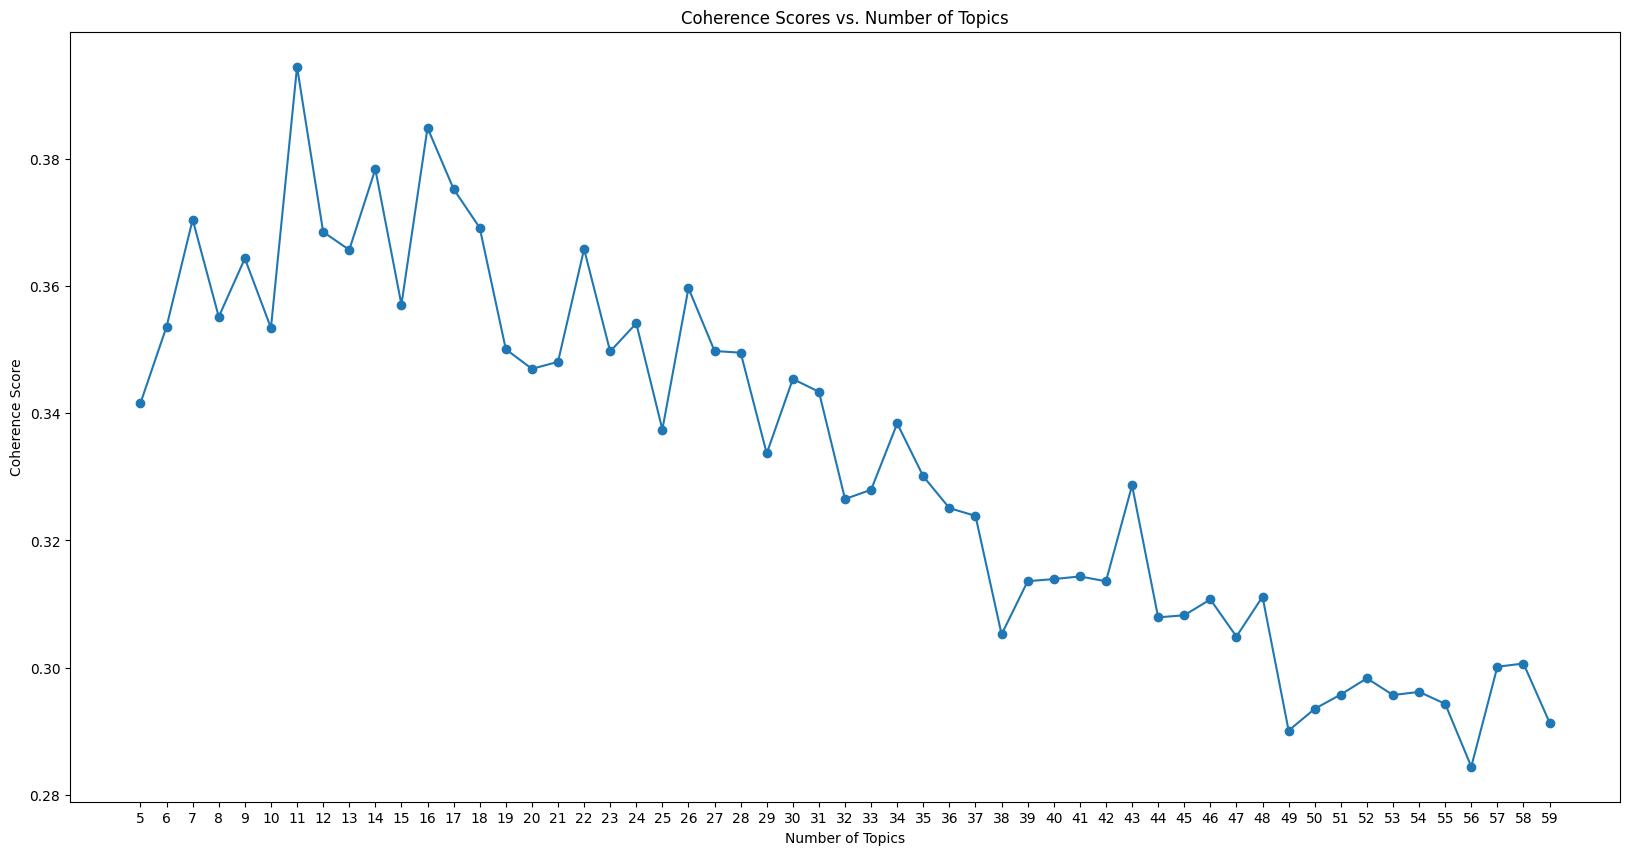

In [50]:
# Call the function to plot the coherence scores
plot_coherence_scores(num_topics_range, coherence_scores)

In [51]:
def train_lda_model(texts, num_topics):
    tokenized_texts, bigram_texts = build_unigram_bigram(texts)

    # Create the dictionary
    dictionary = Dictionary(bigram_texts)

    # Create the corpus
    corpus = [dictionary.doc2bow(text) for text in bigram_texts]

    # Build the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=100, passes=10, chunksize=500)

    # Get the topics and keywords
    topics = lda_model.show_topics(num_topics=num_topics, formatted=False)

    # Extract the keywords from the topics
    topic_keywords = []
    for topic_id, topic in topics:
        keywords = [word for word, _ in topic]
        topic_keywords.append(keywords)

    return lda_model, topics, dictionary, corpus

In [52]:
# train_lda_model(df['document'].to_list())

In [53]:
model_, topics_, dictionnary_, corpus_ = train_lda_model(df_traditional['document'].to_list(), 11)

In [54]:
def visualize_topics(lda_model, corpus, dictionary):
    pyLDAvis.enable_notebook()
    # Convert the Gensim LDA model to pyLDAvis format
    vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

    # Display the interactive visualization
    return pyLDAvis.display(vis_data)

In [55]:
visualize_topics(model_, corpus_, dictionnary_)

In [56]:
model_.print_topics()

[(0,
  '0.151*"test" + 0.047*"training" + 0.027*"array" + 0.018*"pipeline" + 0.016*"magento" + 0.015*"engine" + 0.015*"finding" + 0.014*"nuget_package" + 0.014*"tests" + 0.013*"javascript"'),
 (1,
  '0.041*"error" + 0.021*"run" + 0.019*"get" + 0.019*"using" + 0.017*"code" + 0.015*"following" + 0.015*"im" + 0.012*"work" + 0.012*"version" + 0.011*"project"'),
 (2,
  '0.206*"event" + 0.061*"jar" + 0.059*"tag" + 0.045*"gt" + 0.043*"correlation_id" + 0.033*"channel" + 0.023*"null" + 0.016*"integration" + 0.016*"sentry" + 0.016*"bundle"'),
 (3,
  '0.155*"file" + 0.077*"log" + 0.020*"using" + 0.016*"configuration" + 0.015*"want" + 0.014*"branch" + 0.014*"git" + 0.013*"write" + 0.012*"files" + 0.012*"create"'),
 (4,
  '0.198*"nlog" + 0.043*"target" + 0.032*"nlogconfig" + 0.029*"merge" + 0.019*"php" + 0.018*"net_core" + 0.013*"elasticsearch" + 0.011*"index" + 0.011*"master" + 0.011*"laravel"'),
 (5,
  '0.062*"log" + 0.031*"message" + 0.029*"logging" + 0.026*"using" + 0.017*"output" + 0.017*"ser

In [57]:
import csv

def save_topics(lda_model, num_topics, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Topic ID', 'Words', 'Coefficients'])
        for topic_id in range(num_topics):
            topic_words = lda_model.show_topic(topic_id)
            words = [word for word, _ in topic_words]
            coefficients = [coef for _, coef in topic_words]
            writer.writerow([topic_id, ", ".join(words), ", ".join(map(str, coefficients))])


In [58]:
save_topics(model_, num_topics=11, filename='topics_logging.csv')

In [62]:
def assign_topics_to_documents(model, dictionary, documents_df, document_column='document'):
    # Load the LDA model and dictionary
    lda_model = model
    dictionary = dictionary
    
    # Process the documents: assume preprocessing is already done, split if needed
    texts = [doc.split() for doc in documents_df[document_column]]
    
    # Convert the texts to the corpus format using the dictionary
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Assign the dominant topic to each document
    documents_df['dominant_topic'] = [
        max(lda_model[doc], key=lambda x: x[1])[0]  # Get the topic with the highest probability
        for doc in corpus
    ]
    
    return documents_df

In [63]:
# Example usage:
# Assuming 'df_documents' is your DataFrame and it has been preprocessed appropriately.
# You should have 'lda_model_path' and 'dictionary_path' as the paths where your model and dictionary are stored.
df_traditional_with_topics = assign_topics_to_documents(model_, dictionnary_, df_traditional)

In [66]:
def load_topic_descriptions(topic_file):
    # Load the topic file which contains topic IDs and their descriptions
    topics_df = pd.read_csv(topic_file)
    # Create a dictionary to map topic ID to its description
    topic_map = {row['Topic ID']: row['Words'] for index, row in topics_df.iterrows()}
    return topic_map

def assign_lda_topics(lda_model_path, dictionary_path, documents_df, topic_file, document_column='document'):
    # Load the LDA model and dictionary
    lda_model = lda_model_path
    dictionary = dictionary_path
    
    # Load the topic descriptions
    topic_map = load_topic_descriptions(topic_file)
    
    # Process the documents: assume preprocessing is already done, split if needed
    texts = [doc.split() for doc in documents_df[document_column]]
    
    # Convert the texts to the corpus format using the dictionary
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    # Assign the dominant topic to each document and map it to the actual description
    documents_df['dominant_topic_id'] = [
        max(lda_model[doc], key=lambda x: x[1])[0]  # Get the topic ID with the highest probability
        for doc in corpus
    ]
    documents_df['dominant_topic'] = documents_df['dominant_topic_id'].map(topic_map)

    return documents_df

In [67]:
# Example usage:
# Assuming 'df_documents' is your DataFrame and it has been preprocessed appropriately.
# You should have 'lda_model_path', 'dictionary_path', and 'topic_file_path' as the paths where your model, dictionary, and topics are stored.
df_with_topics = assign_lda_topics(model_, dictionnary_, df_traditional, 'topics_logging.csv')

In [68]:
df_with_topics

,Title,Body,document,dominant_topic,dominant_topic_id
0,Use Fluent API to control how complex objects ...,<p>Let's consider i have a model.</p>\n<pre cl...,use fluent api control complex object logged s...,"class, using, winston, use, logger, property, ...",7
1,How to configure slf4j and logback to allow on...,<p>I have one Java class that is multithreaded...,configure logback allow one class log separat...,"log, message, logging, using, output, serilog,...",5
2,log44j2 get string before add it to a file,"<p>I Have Used Log4j2 framework, and it produc...",get string add file used framework produce j...,"class, using, winston, use, logger, property, ...",7
3,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<p>I am trying to use <code>torch.compile</cod...,set torchlogsdynamo information trying use sp...,"error, run, get, using, code, following, im, w...",1
4,Is this a valid approach to use POSIX signals ...,<p>I want to be able to set python logging lev...,valid approach use posix signal set logging le...,"log, message, logging, using, output, serilog,...",5
...,...,...,...,...,...
32603,zerolog with stdout and file logger adds addit...,<p>I am using <code>zerolog</code> package in ...,zerolog stdout file logger add additional mess...,"log, message, logging, using, output, serilog,...",5
32607,How do I test that zerolog logger raised log e...,<p>In my Go app I moved error logging into a s...,test zerolog logger raised log event type erro...,"log, message, logging, using, output, serilog,...",5
32610,Change position level and timestamp zerolog go...,<p>i'm using zerolog for logging and got compl...,change position level timestamp zerolog golang...,"log, message, logging, using, output, serilog,...",5
32611,How to extract the zerolog event fields in the...,<p>I wrote a code for integrating Azure app in...,extract zerolog event field hook wrote code in...,"class, using, winston, use, logger, property, ...",7


In [64]:
df_traditional_with_topics

,Title,Body,document,dominant_topic
0,Use Fluent API to control how complex objects ...,<p>Let's consider i have a model.</p>\n<pre cl...,use fluent api control complex object logged s...,7
1,How to configure slf4j and logback to allow on...,<p>I have one Java class that is multithreaded...,configure logback allow one class log separat...,5
2,log44j2 get string before add it to a file,"<p>I Have Used Log4j2 framework, and it produc...",get string add file used framework produce j...,7
3,"Set TORCH_LOGS=""+dynamo"" and TORCHDYNAMO_VERBO...",<p>I am trying to use <code>torch.compile</cod...,set torchlogsdynamo information trying use sp...,1
4,Is this a valid approach to use POSIX signals ...,<p>I want to be able to set python logging lev...,valid approach use posix signal set logging le...,5
...,...,...,...,...
32603,zerolog with stdout and file logger adds addit...,<p>I am using <code>zerolog</code> package in ...,zerolog stdout file logger add additional mess...,5
32607,How do I test that zerolog logger raised log e...,<p>In my Go app I moved error logging into a s...,test zerolog logger raised log event type erro...,5
32610,Change position level and timestamp zerolog go...,<p>i'm using zerolog for logging and got compl...,change position level timestamp zerolog golang...,5
32611,How to extract the zerolog event fields in the...,<p>I wrote a code for integrating Azure app in...,extract zerolog event field hook wrote code in...,7


In [65]:
df_traditional_with_topics.to_csv("Logging_with_topics.csv")

In [69]:
df_with_topics.to_csv("Logging_with_topics2.csv")

In [59]:
# Compute Perplexity
print('\nPerplexity: ', model_.log_perplexity(corpus_))  


Perplexity:  -9.014897990577392


In [ ]:
df_ML = pd.read_excel("Full_dataset.xlsx")
df_ML

In [ ]:
df_ML = preprocess_text(df_ML)
df_ML

In [ ]:
coherence_scores = find_optimal_num_topics(df_ML['document'].to_list(), num_topics_range)

In [ ]:
print(coherence_scores)

In [ ]:
print(num_topics_range)

In [ ]:
# Call the function to plot the coherence scores
plot_coherence_scores(num_topics_range, coherence_scores)

In [ ]:
model_, topics_, dictionnary_, corpus_ = train_lda_model(df_ML['document'].to_list(), 8)

In [ ]:
visualize_topics(model_, corpus_, dictionnary_)

In [ ]:
model_.print_topics()

In [ ]:
save_topics(model_, num_topics=8, filename='topics_ML.csv')